<h1><b>Statistique en Bioinformatique : </b> TME4 </h1>
<br>
L’objectif de ce TME sont: 
<br>
<ul>
<li> objectif 1 : Utiliser les chaines de Markov pour comprendre les états phénotypiques de cellules cancéreuses.   </li> 
<li> objectif 2 : étudier la dynamique des proportions phénotypiques dans les lignées cellulaires du cancer du sein humain: SUM159 et SUM149</li>
</ul>
<br>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p><b>Soumission</b></p>
<ul>
<li>Renomer le fichier TME3.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre sur moodle </li>
</div>


Nom etudiant 1 : Grichi Ihsân
<br>
Nom etudiant 2 : Bibi Triki Adel
<br>

<h3>Introduction</h3>
<ul>
<li> Les cellules cancéreuses au sein des tumeurs existent souvent dans des états phénotypiques distincts.</li>
<li> Les sous-populations de cellules purifiées pour un état phénotypique reviennent vers des proportions d'équilibre dans le temps.</li>
<li> Cet équilibre peut s'expliquer par un modèle de Markov dans lequel les cellules passent de manière stochastique entre les états.  </li>
</ul>

<img src="img/CellStateTransition.png" />

<b>Exercice 1</b>:
Traduire les graphes de transition de la figure D en matrices de transition, 
$P_{149}$ et $P_{159}$. Verifier bien que les matrices et les vecteur  $\pi_{0}$ soitent normalisés.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.legend_handler import HandlerLine2D
import random
import math as mt
import random as rd

#distribuition inicialle vecteur pi_0 S, L, B
pi0_149 = np.array([0.039, 0.033, 0.9280])
pi0_159 = np.array([0.019, 0.973, 0.0062])



#matrices 
p_149 = np.array([[0.61, 0.30, 0.09], [0.01, 0.99, 0.00], [0.01, 0.08, 0.90]])


p_159 = np.array([[0.58, 0.07, 0.35], [0.04, 0.47, 0.49], [0.01, 0.00, 0.99]])

#Normaliser les vecteurs π0.




def normalise(m):
    """
    Normalise a matrix
    input1 m: matrix
    output1 mN: normalised matrix
    """
    N = m.sum(axis = 1)
    mN = m/N
    
    return np.round(mN, 2) 

p_149 = normalise(p_149)
print (normalise(p_149))
#[[0.61       0.3        0.09      ]
# [0.01       0.99       0.        ]
# [0.01010101 0.08080808 0.90909091]]

p_159 = normalise(p_159)
print (normalise(p_159))
#[[0.58 0.07 0.35]
# [0.04 0.47 0.49]
# [0.01 0.00 0.99]]

[[0.61 0.3  0.09]
 [0.01 0.99 0.  ]
 [0.01 0.08 0.91]]
[[0.58 0.07 0.35]
 [0.04 0.47 0.49]
 [0.01 0.   0.99]]


<b>Exercice 2</b>: Déterminer les états stationnaires 
$\pi^\star_{149}$ et $\pi^\star_{159}$. 
Est-ce que les valeurs que vous trouvez sont consistentes avec les 
valeurs experimentales en Fig. 1?

In [2]:
#You can use the function numpy.linalg.eig
#https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

p_149T = p_149.T
eigenvalues, eigenvectors = np.linalg.eig(p_149T)

for k in range (len(eigenvalues)):
    if np.abs(eigenvalues[k] - 1) < 1e-6:
        vp = eigenvectors[:, k]
        
    
p_159T = p_159.T
eigenvalues2, eigenvectors2 = np.linalg.eig(p_159T)

for k in range(len(eigenvalues2)):
    if np.abs(eigenvalues2[k] - 1) < 1e-6:
        vp2 = eigenvectors2[:, k]

        
pi_stat_149 = vp/vp.sum()
pi_stat_159 = vp2/vp2.sum()

print ("Pi star 149 " , pi_stat_149)
print ("Pi star 159 " , pi_stat_159)

#Pi star 149  [0.02500625 0.95023756 0.02475619]
#Pi star 159  [0.0234721  0.00310009 0.97342781]


Pi star 149  [0.025 0.95  0.025]
Pi star 159  [0.0234721  0.00310009 0.97342781]


<b>Exercice 3</b>: Déterminer les matrices de transition $P_{149}^n$ et $P_{159}^n$ pour $n$ 
iterations avec $n=2,4,8,16,32,64$, imprimer toutes les matrices. Computer les vectors $\pi^{(n)}$ et les comparer avec
$\pi^\star_{149,159}$. Utilisez le $\pi^0$ du papier de Gupta, page 2, ci-dessous.

In [3]:
pi_zero_149 = np.array([[0.039, 0.928, 0.033]])
pi_zero_159 = np.array([[0.019, 0.0062, 0.973]])


#matrice P**n
def matTransN(P, n):
    """
    Compute the transition matrix after N iterations
    input1 P: matrix
    input2 n: number of iterations
    output Pn: transition matrix after N iterations
    """
    Pn = P
    
    for k in range(n):
        Pn = Pn@P

    return Pn

#matrice P**n where n = 2,4,8,16,32,64
def printMat(P, n, pi_0, M_name):
    """
    Print all P**n matrices, where n in  {2,4,8,16,32,64, ...}  
    input1 P: matrix
    input2 n: number of iterations
    input3 pi_0: initial condition
    input4 M_name: matrix identifier
    output: None
    """
    for k in [2, 4, 8, 16, 32, 64]:
        pi = matTransN(P, k)
        print('pi_' + str(M_name)+ '^'+ str(k) + ':', matTransN(P, k), '\n')
        print('pi' + str(k), pi_0 @ pi, '\n')
    pass

print (printMat(p_149, 2, pi_zero_149, '149'))
print (printMat(p_159, 2, pi_zero_159, '159'))

pi_149^2: [[0.2356   0.606072 0.158328]
 [0.0196   0.978141 0.002259]
 [0.0196   0.22457  0.75583 ]] 

pi2 [[0.028024   0.93876247 0.03321353]] 

pi_149^4: [[0.100816   0.73515454 0.16402946]
 [0.023056   0.97150968 0.00543432]
 [0.023056   0.34747754 0.62946646]] 

pi4 [[0.02608864 0.94169877 0.03221259]] 

pi_149^8: [[0.03482575 0.83259339 0.13258086]
 [0.02474806 0.96398298 0.01126896]
 [0.02474806 0.53605318 0.43919876]] 

pi8 [[0.02514109 0.94473711 0.03012181]] 

pi_149^16: [[0.02516503 0.89795125 0.07688372]
 [0.02499577 0.95649446 0.01850977]
 [0.02499577 0.75525939 0.21974484]] 

pi16 [[0.02500237 0.94757051 0.02742712]] 

pi_149^32: [[0.02500005 0.93851594 0.03648401]
 [0.025      0.9514355  0.0235645 ]
 [0.025      0.9069349  0.06806511]] 

pi32 [[0.025      0.94946312 0.02553688]] 

pi_149^64: [[0.025      0.94943841 0.02556159]
 [0.025      0.9500702  0.0249298 ]
 [0.025      0.94789404 0.02710596]] 

pi64 [[0.025      0.94997375 0.02502625]] 

None
pi_159^2: [[0.207544 0.

<b> Exercice 4 </b>:
 Ecrire une fonction pour déterminer les
$(\pi^{(t)})_{t=1:n}$ d'une chaine de Markov à trois états. Appliquer
pour $P_{149}$ et $P_{159}$, pour les conditions initiales 
$\pi^{(0)}\in\{ (0.998,0.001,0.001), (0.001,0.998,0.001), 
(0.001,0.001,0.998) \}$ et pour $n=20$ itérations de la chaine 
de Markov. Visualiser graphiquement les résultats.


In [4]:

def Pi_n(pi_0, P, n):
    """
    Compute Pi_n = Pi_0*P^n
    input1 pi_0: intial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output Pi_n
    """
    Pn = matTransN(P, n)
    Pi_n = pi_0 @ Pn
    
    
    return Pi_n 


In [5]:
def List_Pi_n(pi0, P, n):
    """
    Compute a list of  Pi_n
    input1 pi_0: intial condition
    input2 P: transition matrix
    input3 n: number of iterations
    output liste_M_trans: list
    """
    liste_Pi_n= [pi0]
    for k in range(1, n):
        pi_n = Pi_n(pi0, P, k)
        liste_Pi_n.append(pi_n)
    return np.array(liste_Pi_n)

In [6]:
def plot(liste_Pi_n):
    """
    Plot liste_Pi_n
    """
    Y = np.array(liste_Pi_n)
    X = np.linspace(0, 20, 20)
    a = Y[:, 0]
    b = Y[:, 1]
    c = Y[:, 2]
    plt.plot(X, a, label='état S')
    plt.plot(X, b, label='état B')
    plt.plot(X, c, label='état L')
    plt.legend()
    plt.show()

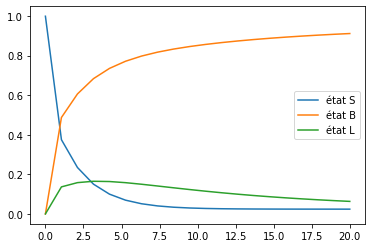

In [34]:
pi1 = np.array([0.998,0.001,0.001])
plot(List_Pi_n(pi1, p_149, 20))

<b> Exercice 5 </b>:
Ecrire une fonction pour simuler la trajectoire stochastique
$(x_t)_{t=0:n}$ d'une seule réalisation de la chaine de Markov. 
Créer des population de $N=10,100,1000,10000$ trajectoires. Estimer 
la trajectoire moyenne de chaque population.


In [35]:
def Trajectoire (n, Pi_0, P):
    """
    simulate the stochastic trajectory
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transition matrix
    output Traj: list of states that simulates the stochastic trajectory ['S', 'B', 'L']
    """
    S_Pi_0 = np.copy(Pi_0)
    S_Pi_0 = np.cumsum(S_Pi_0)
    
    S_P = np.copy(P)
    S_P = np.cumsum(S_P, axis=1)
    
    Traj =[]
    
    N = len(P[0])
    M = len(S_Pi_0)
    
    jet = rd.random()
    etat = M-1                      #dans l'éventualité où la somme de S_Pi_0 n'est pas égale à 1 
                                    #(c'est le cas pour pi0_159 dont la somme vaut 0.9982)
    
    if n>0:                         #si l'on demande 0 points on en aura effectivement 0 et pas 1 par défaut
        for k in range(len(S_Pi_0)):
            if jet < S_Pi_0[k]:
                etat = k
                Traj.append(etat)
                break
    
    i = 2
    while i <= n:
        for k in range(M):
            jet = rd.random()
            if jet < S_P[etat][k]:
                etat = k
                Traj.append(etat)
                break
        i += 1
    
    return Traj

#Déterminer une trajectoire pour N population.
def Trajectoire_P(n, Pi_0, P, N):
    """
    Simulate a trajectory for N population.
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    input3 N: population size
    output TrajP: trajectory
    """
    TrajP = []
    
    for k in range(N):
        TrajP.append(Trajectoire(n, Pi_0, P))

    return TrajP
    
#Estimer la trajectoire moyenne d'une chaine de markov pou N

def Trajectoire_moy(n, Pi_0, P, N):
    """
    Find the mean tragetoire
    input1 n: number of iterations
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    input3 N: population size
    output TrajMoy: mean trajectory
    """
    s = len(Pi_0)
    
    TrajMoy = np.zeros((s, n))
    TrajP = Trajectoire_P(n, Pi_0, P, N)
    TrajP = np.array(TrajP)
    
    
    for j in range(n):
        k = np.array([0 for k in range(s)])
        for i in range(N):
            k[TrajP[i][j]] += 1
        TrajMoy[:, j] = k/N     
        
    return TrajMoy

#Visualiser graphique des trajectoires.
def plotTrajectory(t):
    """
    Plot Trajectory
    input1 t: trajectory
    """
    Y = np.array(t)
    X = np.linspace(0, len(t[0]), len(t[0]))
    a = Y[0, :]
    b = Y[1, :]
    c = Y[2, :]
    plt.plot(X, a, label='état S')
    plt.plot(X, b, label='état B')
    plt.plot(X, c, label='état L')
    plt.legend()
    plt.show()

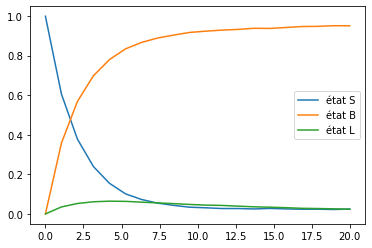

In [36]:
TrajMoy = Trajectoire_moy(20, pi1, p_149, 10000)
plotTrajectory(TrajMoy)

<b> Exercice 6 </b>: 
Ecrire une fonction pour calculer la probabilité d'une trajectoire
$(x_t)_{t=0:n}$. Pour y facilite vous devez applique le log et utlise la somme au
lieu du product.  Ensuite vouz devez comparer les probabilités de 
deux chaines de Markov $P_{149}$ et $P_{159}$. Visualiser les histogrammes pour les deux populations de taille $N=10000$ (géenérées avec $P_{149}$ et $P_{159}$). Est-ce que vous observez des différences entre les deux modèles? Comment est-ce que vous expliquer cettes différences?

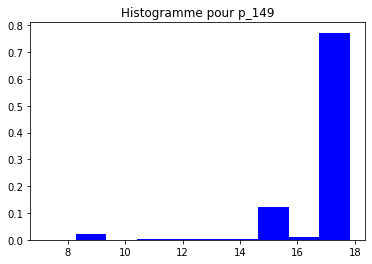

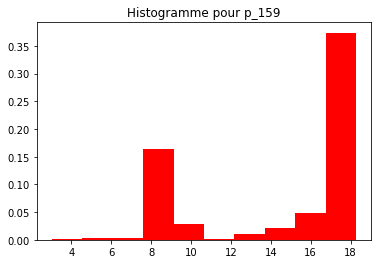

In [53]:
#Calculer la probabilité d’une trajectoire (xt)t=0:n
def Pb_Trajectoire(Traj, Pi_0, P): 
    """
    Compute the probability of a trajectory
    input1 Traj: a trajectory
    input2 Pi_0: initial condition
    input3 P: transtion matrix
    output Proba: ptobability
    """
    etat = Traj[0]
    Proba = np.log(Pi_0[Traj[0]])
    
    for k in Traj[1:]:
        Proba += P[etat][Traj[k]]
        etat = Traj[k]
    
    return Proba

def Histo(Trajs, Pi_0, P):
    """
    compute a histogramm of Trajectory probabilities
    input1 Trajs: a trajectory population
    input2 Pi_0: initial condition
    input3 P: transtion matrix  
    output pop: a list of probabilities
    """
    pop = []
    for Traj in Trajs:
        pop.append(Pb_Trajectoire(Traj, Pi_0, P))

    return pop


def plotHist(Histo149, Histo159):
    """
    Plot two probabilities histogram
    input1 Histo149: a list of probabilities for P149
    input1 Histo159: a list of probabilities for P159
    """
    plt.title('Histogramme pour p_149')
    plt.hist(Histo149, color = 'blue', density = True)
    plt.show()
    plt.title('Histogramme pour p_159')
    plt.hist(Histo159, color = 'red', density = True)
    plt.show()
#-------------------------------------------------------------
plotHist(Histo(Trajectoire_P(20, pi0_149, p_149, 10000),pi0_149, p_149), Histo(Trajectoire_P(20, pi0_159, p_159, 10000),pi0_159, p_159))